In [1]:
# Packages and paths
# %%
import os
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import numpy as np
import pandas as pd
import geopandas as gp
import scipy.stats as sp
import sys
import zipfile
import fiona

# Add the path to the Utils folder
utils_path = os.path.abspath(os.path.join('..', 'Utils'))
if utils_path not in sys.path:
    sys.path.append(utils_path)

# Now you can import the functions from CustomFunctions.py
import CustomFunctions as cf

# Local paths
datapath = '../../Data'
inputpath = '../../Data/Input'
outputpath = '../../Data/Output/Local'
shapepath = inputpath+'/Shapefiles'
figurepath = '../../Figures/Local/'


In [2]:
folder_path = inputpath+"/NHD/"

# Don't run this if files are already unzipped

# for file in os.listdir(folder_path):
#     if file.endswith(".zip"):
#         with zipfile.ZipFile(os.path.join(folder_path, file), 'r') as zip_ref:
#             zip_ref.extractall(folder_path)

# print("Files unzipped.")

This takes about 2 minutes max

In [3]:
# folder_path = "path_to_your_unzipped_files"
flowline_gdfs = []
point_gdfs = []
value_added_tables = []

for file in os.listdir(folder_path):
    if file.endswith(".gpkg"):
        filepath = os.path.join(folder_path, file)

        # Load specific layers
        flowlines = gp.read_file(filepath, layer="NHDFlowline")
        
        # If the value-added table is non-spatial, use pandas instead
        value_added = gp.read_file(filepath, layer="NHDPlusFlowlineVAA")  # Change to `pd.read_csv()` if needed

        flowline_gdfs.append(flowlines)
        value_added_tables.append(value_added)

# Merge the layers separately
merged_flowlines = gp.GeoDataFrame(pd.concat(flowline_gdfs, ignore_index=True))
merged_value_added = pd.concat(value_added_tables, ignore_index=True)  # Non-spatial data

# # Save to new files
# merged_flowlines.to_file("merged_flowlines.gpkg", driver="GPKG")
# merged_value_added.to_csv("merged_value_added_table.csv")  # Save as a CSV if non-spatial


/Users/danielletadych/opt/miniconda3/envs/Drought_Southwest/lib/python3.12/site-packages/pyogrio/raw.py:198: UserWarning: Measured (M) geometry types are not supported. Original type 'Measured 3D MultiLineString' is converted to 'MultiLineString Z'
  return ogr_read(
/Users/danielletadych/opt/miniconda3/envs/Drought_Southwest/lib/python3.12/site-packages/pyogrio/raw.py:198: UserWarning: Measured (M) geometry types are not supported. Original type 'Measured 3D MultiLineString' is converted to 'MultiLineString Z'
  return ogr_read(
/Users/danielletadych/opt/miniconda3/envs/Drought_Southwest/lib/python3.12/site-packages/pyogrio/raw.py:198: UserWarning: Measured (M) geometry types are not supported. Original type 'Measured 3D MultiLineString' is converted to 'MultiLineString Z'
  return ogr_read(
/Users/danielletadych/opt/miniconda3/envs/Drought_Southwest/lib/python3.12/site-packages/pyogrio/raw.py:198: UserWarning: Measured (M) geometry types are not supported. Original type 'Measured 3D 

<Axes: >

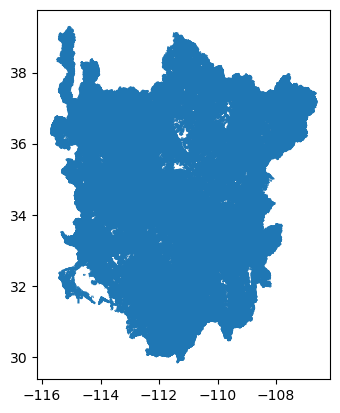

In [21]:
merged_flowlines.plot()

In [4]:
flowlines_VAA = pd.merge(merged_flowlines,merged_value_added,
                         suffixes=['_flowlines','_VAA'], how="inner",
                         on=['nhdplusid','reachcode'])
flowlines_VAA.head()

,permanent_identifier,fdate,resolution,gnis_id,gnis_name,lengthkm,reachcode,flowdir,wbarea_permanent_identifier,ftype,...,vpuid_VAA,divergence_description,startflag_description,terminalfl_description,rtndiv_description,vpuin_description,vpuout_description,elevfixed_description,hwtype_description,statusflag_description
0,67120165,2021-11-30 00:00:00+00:00,2,00012758,Tse Bonito Wash,0.381769,15020006000324,1,None,460,...,1502,Feature is not part of a divergence,No,No,No,No,No,No,Undefined,Add
1,67121173,2021-11-30 00:00:00+00:00,2,None,None,2.018803,15020006000758,1,None,460,...,1502,Feature is not part of a divergence,No,No,No,No,No,No,Undefined,Add
2,67120427,2021-11-30 00:00:00+00:00,2,None,None,0.822904,15020006000759,1,None,460,...,1502,Feature is not part of a divergence,No,No,No,No,No,No,Undefined,Add
3,67120097,2021-11-30 00:00:00+00:00,2,None,None,0.295969,15020006003256,1,None,460,...,1502,Feature is not part of a divergence,Yes,No,No,No,No,Yes,Real Headwater,Add
4,67120829,2021-11-30 00:00:00+00:00,2,None,None,0.605038,15020006003468,1,None,460,...,1502,Feature is not part of a divergence,No,No,No,No,No,Yes,Undefined,Add


In [5]:
flowlines_VAA.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1232056 entries, 0 to 1232055
Data columns (total 74 columns):
 #   Column                        Non-Null Count    Dtype              
---  ------                        --------------    -----              
 0   permanent_identifier          1232056 non-null  object             
 1   fdate                         1232056 non-null  datetime64[ms, UTC]
 2   resolution                    1232056 non-null  int32              
 3   gnis_id                       119190 non-null   object             
 4   gnis_name                     119193 non-null   object             
 5   lengthkm                      1232056 non-null  float64            
 6   reachcode                     1232056 non-null  object             
 7   flowdir                       1232056 non-null  int32              
 8   wbarea_permanent_identifier   110788 non-null   object             
 9   ftype                         1232056 non-null  int32              
 10

In [6]:
# I would like to now filter to only include a certain stream order
stream_order = 3
filtered_flowlines = flowlines_VAA[flowlines_VAA["streamorde"] > stream_order]

filtered_flowlines.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 177936 entries, 121 to 1232050
Data columns (total 74 columns):
 #   Column                        Non-Null Count   Dtype              
---  ------                        --------------   -----              
 0   permanent_identifier          177936 non-null  object             
 1   fdate                         177936 non-null  datetime64[ms, UTC]
 2   resolution                    177936 non-null  int32              
 3   gnis_id                       77083 non-null   object             
 4   gnis_name                     77083 non-null   object             
 5   lengthkm                      177936 non-null  float64            
 6   reachcode                     177936 non-null  object             
 7   flowdir                       177936 non-null  int32              
 8   wbarea_permanent_identifier   34940 non-null   object             
 9   ftype                         177936 non-null  int32              
 10  fcode         

<Axes: >

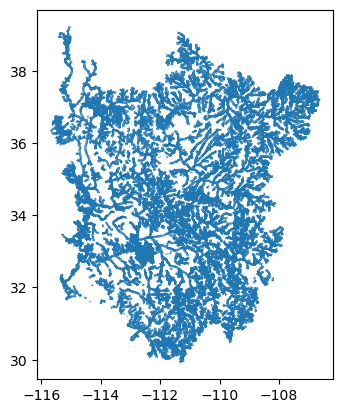

In [7]:
filtered_flowlines.plot()

In [106]:
hucnum = '16'
filepath = shapepath+'/NHD_H_Arizona_State_Shape/Shape/WBDHU'+hucnum+'.shp'
hucs = gp.read_file(filepath)
hucs.head()

,tnmid,metasource,sourcedata,sourceorig,sourcefeat,loaddate,referenceg,areaacres,areasqkm,states,...,name,hutype,humod,tohuc,noncontrib,noncontr_1,shape_Leng,shape_Area,ObjectID,geometry


In [93]:
# Check the crs
print(filtered_flowlines.crs)
print(hucs.crs)

EPSG:4269
EPSG:4269


In [94]:
# Join the databases
flowlines_hucs = gp.sjoin(filtered_flowlines, hucs, how="inner")
flowlines_hucs.info()

# Takes about 4-7 minutes and if it worked, the same number as non-null values before except now it has a huc4 column

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 0 entries
Data columns (total 95 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   permanent_identifier          0 non-null      object             
 1   fdate                         0 non-null      datetime64[ms, UTC]
 2   resolution                    0 non-null      int32              
 3   gnis_id                       0 non-null      object             
 4   gnis_name                     0 non-null      object             
 5   lengthkm                      0 non-null      float64            
 6   reachcode                     0 non-null      object             
 7   flowdir                       0 non-null      int32              
 8   wbarea_permanent_identifier   0 non-null      object             
 9   ftype                         0 non-null      int32              
 10  fcode                         0 non-null      i

In [95]:
flowlines_hucs.head()

,permanent_identifier,fdate,resolution,gnis_id,gnis_name,lengthkm,reachcode,flowdir,wbarea_permanent_identifier,ftype,...,huc14,name,hutype,humod,tohuc,noncontrib,noncontr_1,shape_Leng,shape_Area,ObjectID


So the Flowlines is ready to go, let's connect the point data (has streamgauge data) to the flowlines record with reach codes and drop the geometry of the point data.

This data will be located in a different folder because it was not in the high resolution dataset.

In [96]:
filepath = shapepath+'/NHD_H_Arizona_State_Shape/Shape/NHDPointEventFC.shp'
NHD_Point = gp.read_file(filepath)
NHD_Point.info()


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 4766 entries, 0 to 4765
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   permanent_  4766 non-null   object        
 1   eventdate   4766 non-null   datetime64[ms]
 2   reachcode   4766 non-null   object        
 3   reachsmdat  4766 non-null   datetime64[ms]
 4   reachresol  4766 non-null   int32         
 5   feature_pe  404 non-null    object        
 6   featurecla  569 non-null    float64       
 7   source_ori  4766 non-null   object        
 8   source_dat  4685 non-null   object        
 9   source_fea  4766 non-null   object        
 10  featuredet  4435 non-null   object        
 11  measure     4766 non-null   float64       
 12  eventoffse  0 non-null      float64       
 13  eventtype   4766 non-null   int32         
 14  ObjectID    4766 non-null   int32         
 15  geometry    4766 non-null   geometry      
dtypes: datetime64[ms

The "source_fea" column has the USGS ID we need in order to connect it to the stream gauge data.

Also the reachcode is what connects all this to the flowlines.  So let's first merge the point data to the flowlines

In [97]:
flowlines_points = pd.merge(flowlines_hucs,NHD_Point,
                         suffixes=['_flowlines','_point'], how="left",
                         on=['reachcode'])
flowlines_points.head()

,permanent_identifier,fdate,resolution,gnis_id,gnis_name,lengthkm,reachcode,flowdir,wbarea_permanent_identifier,ftype,...,featurecla,source_ori,source_dat,source_fea,featuredet,measure,eventoffse,eventtype,ObjectID_point,geometry_point


In [98]:
flowlines_points.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 0 entries
Columns: 110 entries, permanent_identifier to geometry_point
dtypes: datetime64[ms, UTC](1), datetime64[ms](3), float64(39), geometry(2), int16(13), int32(10), int64(1), object(41)
memory usage: 132.0+ bytes


In [99]:
print(flowlines_points.columns)

Index(['permanent_identifier', 'fdate', 'resolution', 'gnis_id', 'gnis_name',
       'lengthkm', 'reachcode', 'flowdir', 'wbarea_permanent_identifier',
       'ftype',
       ...
       'featurecla', 'source_ori', 'source_dat', 'source_fea', 'featuredet',
       'measure', 'eventoffse', 'eventtype', 'ObjectID_point',
       'geometry_point'],
      dtype='object', length=110)


This is a monster database so maybe make it a little smaller

In [100]:
smaller_fldb = flowlines_points[['permanent_identifier', 'gnis_name','reachcode','streamorde','source_fea','huc'+hucnum,'name','geometry_flowlines','fcode']]
smaller_fldb

,permanent_identifier,gnis_name,reachcode,streamorde,source_fea,huc14,name,geometry_flowlines,fcode


In [101]:
smaller_fldb = smaller_fldb.rename(columns = {'geometry_flowlines':'geometry',
                                              'name':'huc_name',
                                              'source_fea':'ID'})

In [102]:
smaller_fldb.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 0 entries
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   permanent_identifier  0 non-null      object  
 1   gnis_name             0 non-null      object  
 2   reachcode             0 non-null      object  
 3   streamorde            0 non-null      int16   
 4   ID                    0 non-null      object  
 5   huc14                 0 non-null      object  
 6   huc_name              0 non-null      object  
 7   geometry              0 non-null      geometry
 8   fcode                 0 non-null      int32   
dtypes: geometry(1), int16(1), int32(1), object(6)
memory usage: 132.0+ bytes


ValueError: aspect must be finite and positive 

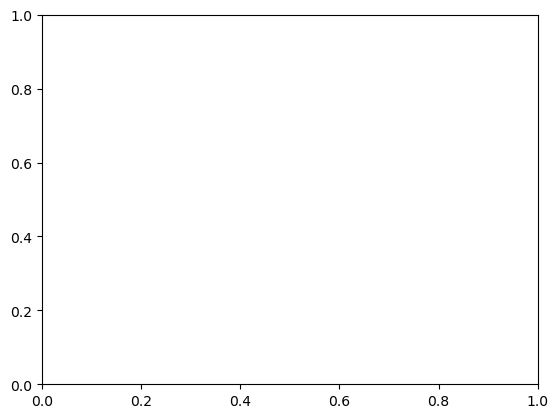

In [103]:
smaller_fldb.plot()

In [91]:
smaller_fldb.to_file(f'{outputpath}/huc{hucnum}flowlines_order{stream_order}plus.shp')

/var/folders/7k/m9jgv50j0qv046r7xmwxt0qh0000gn/T/ipykernel_62702/1992746651.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  smaller_fldb.to_file(f'{outputpath}/huc{hucnum}flowlines_order{stream_order}plus.shp')
/Users/danielletadych/opt/miniconda3/envs/Drought_Southwest/lib/python3.12/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'permanent_identifier' to 'permanent_'
  ogr_write(
